### ***Importación de librerias***

In [270]:
import pandas as pd
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam, sgd, rmsprop
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### ***Importación de datos de entrenamiento a procesar***

In [164]:
train = pd.read_csv('dataset2/CSV/clothes.csv')
y_train = train['label'][0:1600].values

scaler_HARALICK = StandardScaler()
scaler_WAVELET = StandardScaler()

HARALICK_Train = pd.read_csv('dataset2/CSV/Haralick_Descriptor_clothes_Train.csv')
WAVELET_Train = pd.read_csv('dataset2/CSV/WAVELET_Descriptor_clothes_Train.csv')

HARALICK_Train = HARALICK_Train.to_numpy()
WAVELET_Train = WAVELET_Train.to_numpy()

HARALICK_Train = scaler_HARALICK.fit_transform(HARALICK_Train)
WAVELET_Train = scaler_WAVELET.fit_transform(WAVELET_Train)

print(HARALICK_Train.shape)
print(WAVELET_Train.shape)
print(y_train.shape)

(1600, 96)
(1600, 1568)
(1600, 17)
(1600, 20)
(1600, 30)
(1600,)


### ***Concatenación de descriptores***

In [216]:
descriptor_x_train = np.concatenate((HARALICK_Train, WAVELET_Train), axis=1)
descriptor_x_train.shape

(1600, 126)

### ***Importación de datos de prueba a procesar***

In [166]:
y_test = train['label'][1601:2000].values

HARALICK_Test = pd.read_csv('dataset2/CSV/Haralick_Descriptor_clothes_Test.csv')
WAVELET_Test = pd.read_csv('dataset2/CSV/WAVELET_Descriptor_clothes_Test.csv')


HARALICK_Test = HARALICK_Test.to_numpy()
WAVELET_Test = WAVELET_Test.to_numpy()

HARALICK_Test = scaler_HARALICK.transform(HARALICK_Test)
WAVELET_Test = scaler_WAVELET.transform(WAVELET_Test)

print(HARALICK_Test.shape)
print(WAVELET_Test.shape)
print(y_test.shape)

(399, 96)
(399, 1568)
(399, 17)
(399, 20)
(399, 30)
(399,)


### ***Concatenación de descriptores***

In [215]:
descriptor_x_test = np.concatenate((HARALICK_Test, WAVELET_Test), axis=1)
descriptor_x_test.shape

(399, 126)

### ***Balanceo de clases***

In [191]:
class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 1.4814814814814814,
 1: 0.8333333333333334,
 2: 1.5763546798029557,
 3: 1.7877094972067038,
 4: 0.517799352750809}

### ***Red neuronal***

13/13 [==============================] - 0s 2ms/step


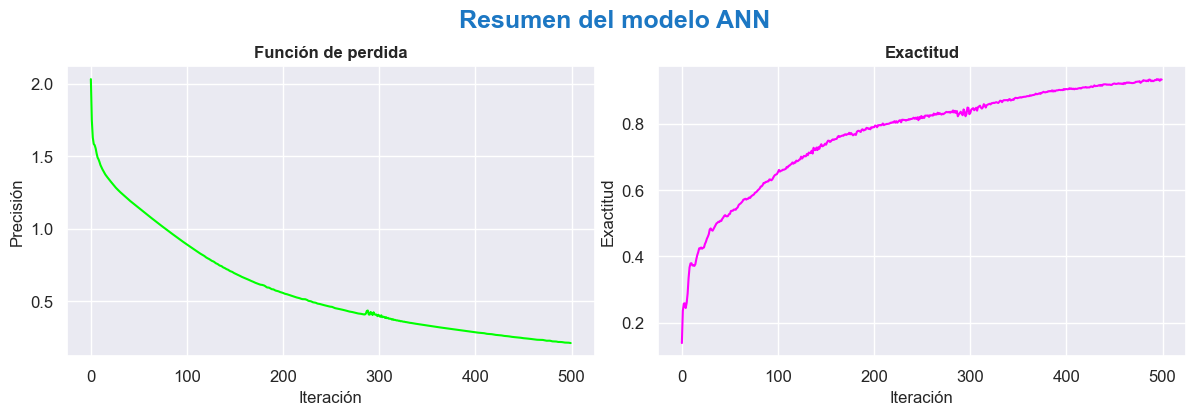

[2.186694860458374, 0.5463659167289734]

In [455]:
import seaborn as sns

adam_optimezer = adam.Adam(learning_rate=0.005)

def ANN(x_train, y_train, x_test, y_test, class_weights, colorGraphic):
    
    model_ANN = Sequential()   
    model_ANN.add(Dense(50, input_dim=x_train.shape[1], activation='relu')) 
    model_ANN.add(Dense(5, activation='softmax'))
    model_ANN.compile(loss='SparseCategoricalCrossentropy', optimizer=adam_optimezer, metrics=['accuracy'])
    historico = model_ANN.fit(x_train, y_train, epochs=500, batch_size=x_train.shape[0], class_weight = class_weights, verbose = 0)
    y_pred = model_ANN.predict(x_test, use_multiprocessing = True, verbose=1)
    y_pred = np.argmax(y_pred, axis = 1)
    score_model = model_ANN.evaluate(x_test, y_test, verbose=0)

    fig, axs = plt.subplots(1, 2, figsize=(12,4))
    fig.suptitle("Resumen del modelo ANN", fontsize=18, fontweight = 'bold', color='#1C77C3')
    fig.tight_layout()
    sns.set()
    axs[0].set_title('Función de perdida', fontweight = 'bold')    
    axs[0].tick_params(labelsize=12)
    axs[0].plot(historico.history['loss'], color = 'lime')
    axs[0].set_ylabel('Precisión')
    axs[0].set_xlabel('Iteración')

    axs[1].set_title('Exactitud', fontweight = 'bold')    
    axs[1].tick_params(labelsize=12)
    axs[1].plot(historico.history['accuracy'], color = 'magenta')
    axs[1].set_ylabel('Exactitud')
    axs[1].set_xlabel('Iteración')

    plt.show()

    return score_model

dataResult_Haralick_modelANN = ANN(descriptor_x_train, y_train, descriptor_x_test, y_test, class_weights, 'cyan')
dataResult_Haralick_modelANN
    

### ***Modelo logístico de regresión***

In [459]:
from sklearn import linear_model

def Log_Reg(x_train, y_train, x_test, y_test, class_weights, colorGraphic):
    
    model_log = linear_model.LogisticRegression(class_weight = class_weights, random_state = 5)  
    historico = model_log.fit(x_train, y_train)
    score_model = model_log.score(x_test, y_test)

    return score_model

dataResult_Haralick_modelANN = Log_Reg(descriptor_x_train, y_train, descriptor_x_test, y_test, class_weights, 'cyan')
dataResult_Haralick_modelANN   

c:\Users\matea\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.45363408521303256